<a href="https://colab.research.google.com/github/utkarshmaheshwari2311/weather/blob/master/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

**Reading the data** 

In [ ]:
dataset = pd.read_csv("/content/datasets_42674_74935_Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Finding the proportion of male and female customers**

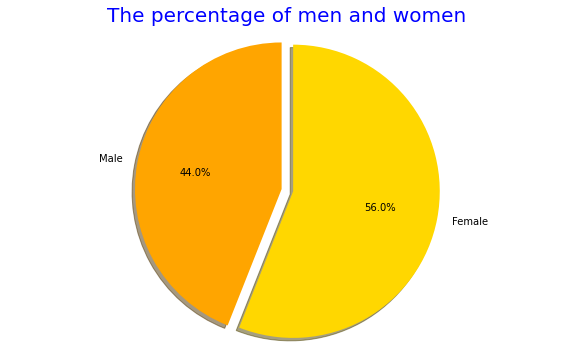

In [ ]:
male = dataset[dataset.Gender == 'Male'].count()[0]
female = dataset[dataset.Gender == 'Female'].count()[0]
explodes = [0.04,0.04]
test = [male,female]
Genders = ['Male','Female']
plt.figure(figsize=(10,6))
plt.pie([male,female],labels = Genders,explode = explodes,colors=["orange","gold"],shadow=True, autopct = '%1.1f%%', startangle= 90, )
plt.axis('equal')
plt.title("The percentage of men and women",fontsize = 20, color = 'Blue')
plt.show()

**Getting the number of male and female customers respectively**



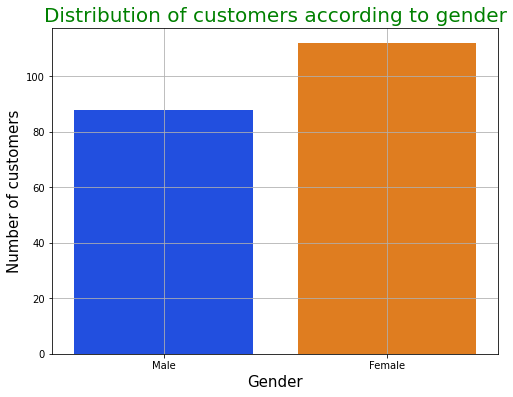

In [ ]:
plt.figure(figsize=(8,6))
sns.axes_style("ticks")
sns.set_palette("bright")
sns.countplot(x = dataset.Gender)
plt.ylabel('Number of customers', fontsize = 15)
plt.xlabel('Gender', fontsize = 15)
plt.title("Distribution of customers according to gender",fontsize = 20, color = "green")
plt.grid()

**Visualising the distribution of customers according to age**

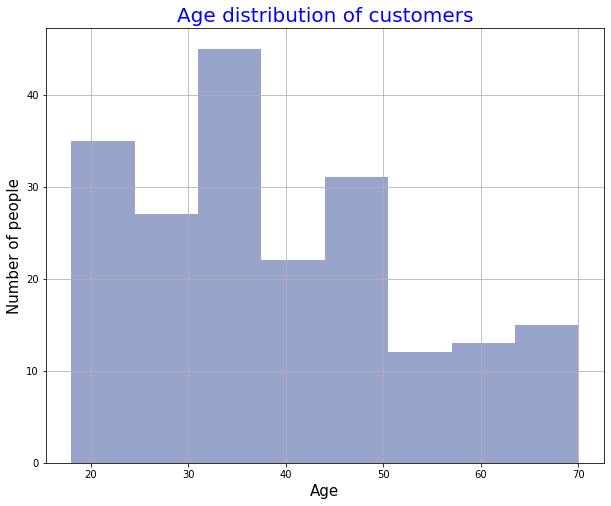

In [ ]:
plt.figure(figsize=(10,8))
sns.axes_style("whitegrid")
sns.set_palette("dark")
sns.distplot(a = dataset['Age'], kde = False, hist_kws = {"linewidth": 1})
plt.xlabel("Age",fontsize = 15)
plt.ylabel("Number of people", fontsize = 15)
plt.title("Age distribution of customers", fontsize = 20, color = "blue")
plt.grid()

**Visualising the incomes of the customers**

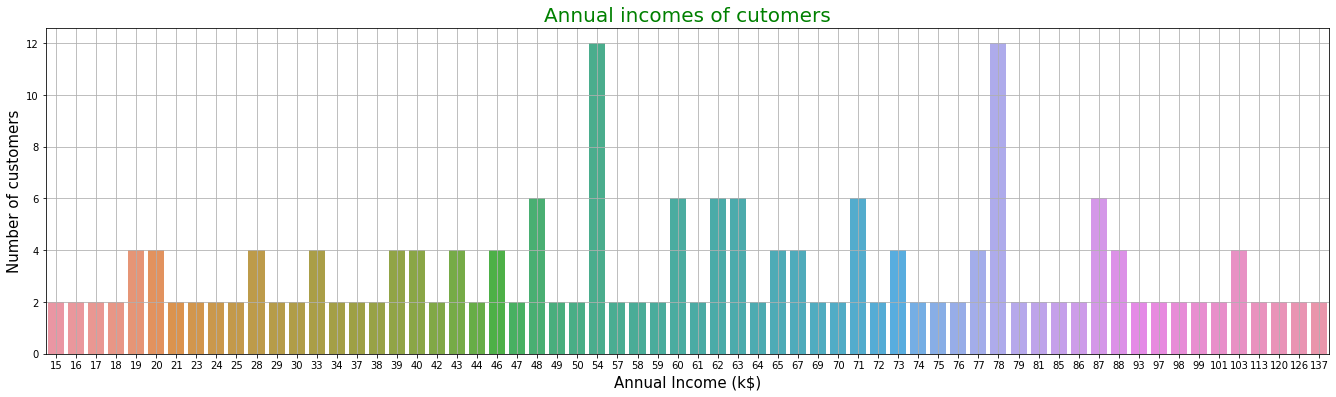

In [ ]:
plt.figure(figsize = (23,6))
sns.countplot(x = dataset["Annual Income (k$)"])
plt.xlabel("Annual Income (k$)", fontsize =15)
plt.ylabel("Number of customers", fontsize = 15)
plt.title("Annual incomes of cutomers", fontsize = 20, color = "green")
plt.grid()
plt.show()

**Visualising the spending scores of the cutomers**

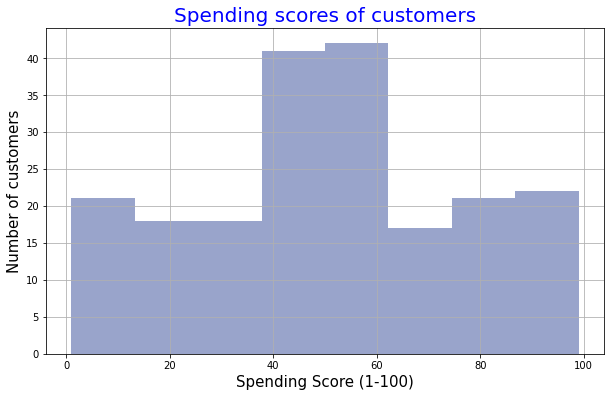

In [ ]:
plt.figure(figsize = (10,6))
sns.set_palette("dark")
sns.distplot(a = dataset["Spending Score (1-100)"], kde = False)
plt.grid()
plt.xlabel("Spending Score (1-100)", fontsize = 15)
plt.ylabel("Number of customers", fontsize = 15)
plt.title("Spending scores of customers", fontsize = 20, color = "blue")
plt.show()

**Visualising the relation between customer income and spending score**

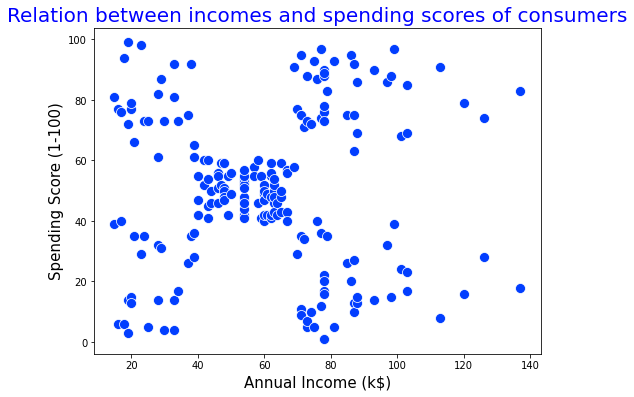

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = dataset["Annual Income (k$)"], y = dataset["Spending Score (1-100)"], s = 100)
plt.xlabel("Annual Income (k$)", fontsize = 15)
plt.ylabel("Spending Score (1-100)", fontsize = 15)
plt.title("Relation between incomes and spending scores of consumers", fontsize = 20, color = "Blue")
plt.show()

**Calculating the optimum number of clusters**

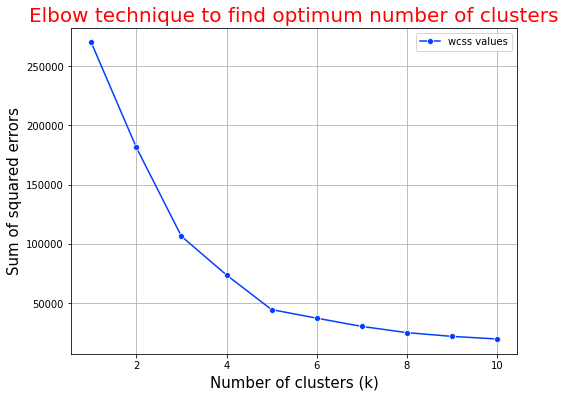

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state =0 )
  kmeans.fit(dataset[["Annual Income (k$)","Spending Score (1-100)"]])
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
sns.lineplot(x = range(1,11), y = wcss, marker= 'o',label = "wcss values")
plt.grid()
plt.xlabel("Number of clusters (k)", fontsize = 15)
plt.ylabel("Sum of squared errors", fontsize = 15)
plt.legend()
plt.title("Elbow technique to find optimum number of clusters", fontsize = 20, color = "red")
plt.show()


**From the above elbow diagram, we see that the elbow is formed at the point between 4 and 6 i.e at 5. This is the optimum number of clusters such that there is neither overfitting nor underfitting**

**Assigning clusters to the consumers**

In [ ]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(dataset[["Annual Income (k$)","Spending Score (1-100)"]])
dataset["Clusters"] = y_kmeans
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


**Visualising the different clusters of consumers**

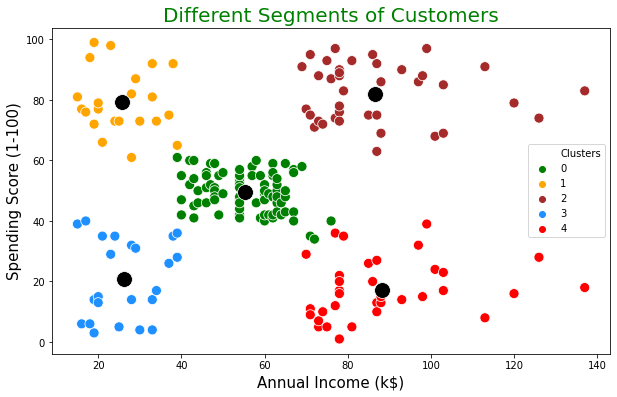

In [ ]:
plt.figure(figsize = (10,6))
sns.set_palette("pastel")
sns.scatterplot(x = dataset["Annual Income (k$)"], y = dataset["Spending Score (1-100)"], hue = dataset["Clusters"], s = 100, palette=['green','orange','brown','dodgerblue','red'], legend='full')
sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], s = 250, marker = 'o', color = 'black')
plt.xlabel("Annual Income (k$)", fontsize = 15)
plt.ylabel("Spending Score (1-100)", fontsize = 15)
plt.title("Different Segments of Customers", fontsize =20, color = "green")
plt.show()


**Analysing the results**


*   We can see that the mall customers can be broadly grouped into 5 groups based on their purchases made in the mall. In cluster 1(yellow colored) we can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.
*   In cluster 0(green colored) we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

*   In cluster 3(blue colored) we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.
*   In cluster 4(red-colored) we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.


*   In cluster 2(brown colored) we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.





